## UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

#### DIABETIC RETINOPATHY DETECTION
- Diabetic Retinopathy is disease that results from complication of type 1 & 2 diabetes and affects patient eyes.
- The disease can develop if blood sugar levels are left uncontrolled for a prolonged period of time.
- It is caused by the damage of blood vessels in the retina which is located in the back of patient's eyes (retina is light sensitive tissue in the eye)
- With the power of Artificial and Deep Learning, doctors will be able to detect blindness before it occurs. **Aravind Eye Hospital** in India hopes to detect and prevent diabetic retinopathy among people mostly living in rural areas where medical screening and experienced doctors are limited [[Reference]](https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/).
- Data Source: [Kaggle - Diabetic Retinopathy Detection](https://www.kaggle.com/competitions/diabetic-retinopathy-detection/data)

<img src="https://neoretina.com/blog/wp-content/uploads/2018/12/diabetic-rethonopaty.jpg" width="600">

image source: 
[Diabetic Retinopathy- Can it be Reversed?](https://neoretina.com/blog/diabetic-retinopathy-can-it-be-reversed/)

#### INPUTS AND OUTPUTS

- The dataset consists of 3662 color images belonging to 5 categories.
- Categories that are present in the data are No_DR, Mild, Moderate, severe, and Profiliferative (rapidly growing).

### Objective
The main goal of this project is to develop a deep learning model to detect diabetic retinopathy, a condition that affects the eyes of diabetic patients, by classifying retinal images into five categories: No Diabetic Retinopathy (No_DR), Mild, Moderate, Severe, and Proliferative. The aim is to leverage models such as ResNet to improve early detection and assist doctors in rural areas with limited access to medical screening.

## IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [4]:
os.listdir(os.path.join('train', 'Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [5]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train', i))
    for j in train_class:
        img = os.path.join('train', i, j)
        train.append(img)
        label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



In [6]:
train

['train\\Mild\\0024cdab0c1e.png',
 'train\\Mild\\00cb6555d108.png',
 'train\\Mild\\0124dffecf29.png',
 'train\\Mild\\01b3aed3ed4c.png',
 'train\\Mild\\0369f3efe69b.png',
 'train\\Mild\\03e25101e8e8.png',
 'train\\Mild\\04ac765f91a1.png',
 'train\\Mild\\059bc89df7f4.png',
 'train\\Mild\\05a5183c92d0.png',
 'train\\Mild\\0684311afdfc.png',
 'train\\Mild\\06b71823f9cd.png',
 'train\\Mild\\07929d32b5b3.png',
 'train\\Mild\\07a1c7073982.png',
 'train\\Mild\\086d41d17da8.png',
 'train\\Mild\\09935d72892b.png',
 'train\\Mild\\0a3202889f4d.png',
 'train\\Mild\\0a61bddab956.png',
 'train\\Mild\\0ad7f631dedb.png',
 'train\\Mild\\0d310aba6373.png',
 'train\\Mild\\0dc031c94225.png',
 'train\\Mild\\0dce95217626.png',
 'train\\Mild\\0eb52045349f.png',
 'train\\Mild\\0f495d87656a.png',
 'train\\Mild\\0fb1053285cf.png',
 'train\\Mild\\101b9ebfc720.png',
 'train\\Mild\\107aea0d9289.png',
 'train\\Mild\\10f36b0239fb.png',
 'train\\Mild\\1116271db4ea.png',
 'train\\Mild\\111898ab463d.png',
 'train\\Mild\

In [7]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

c:\Users\uffin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

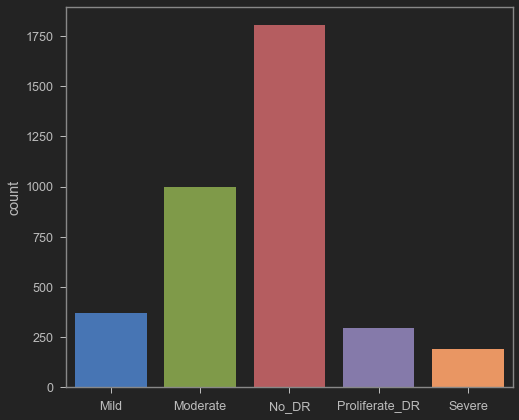

In [8]:
sns.countplot(label)

## PERFORM DATA EXPLORATION AND DATA VISUALIZATION

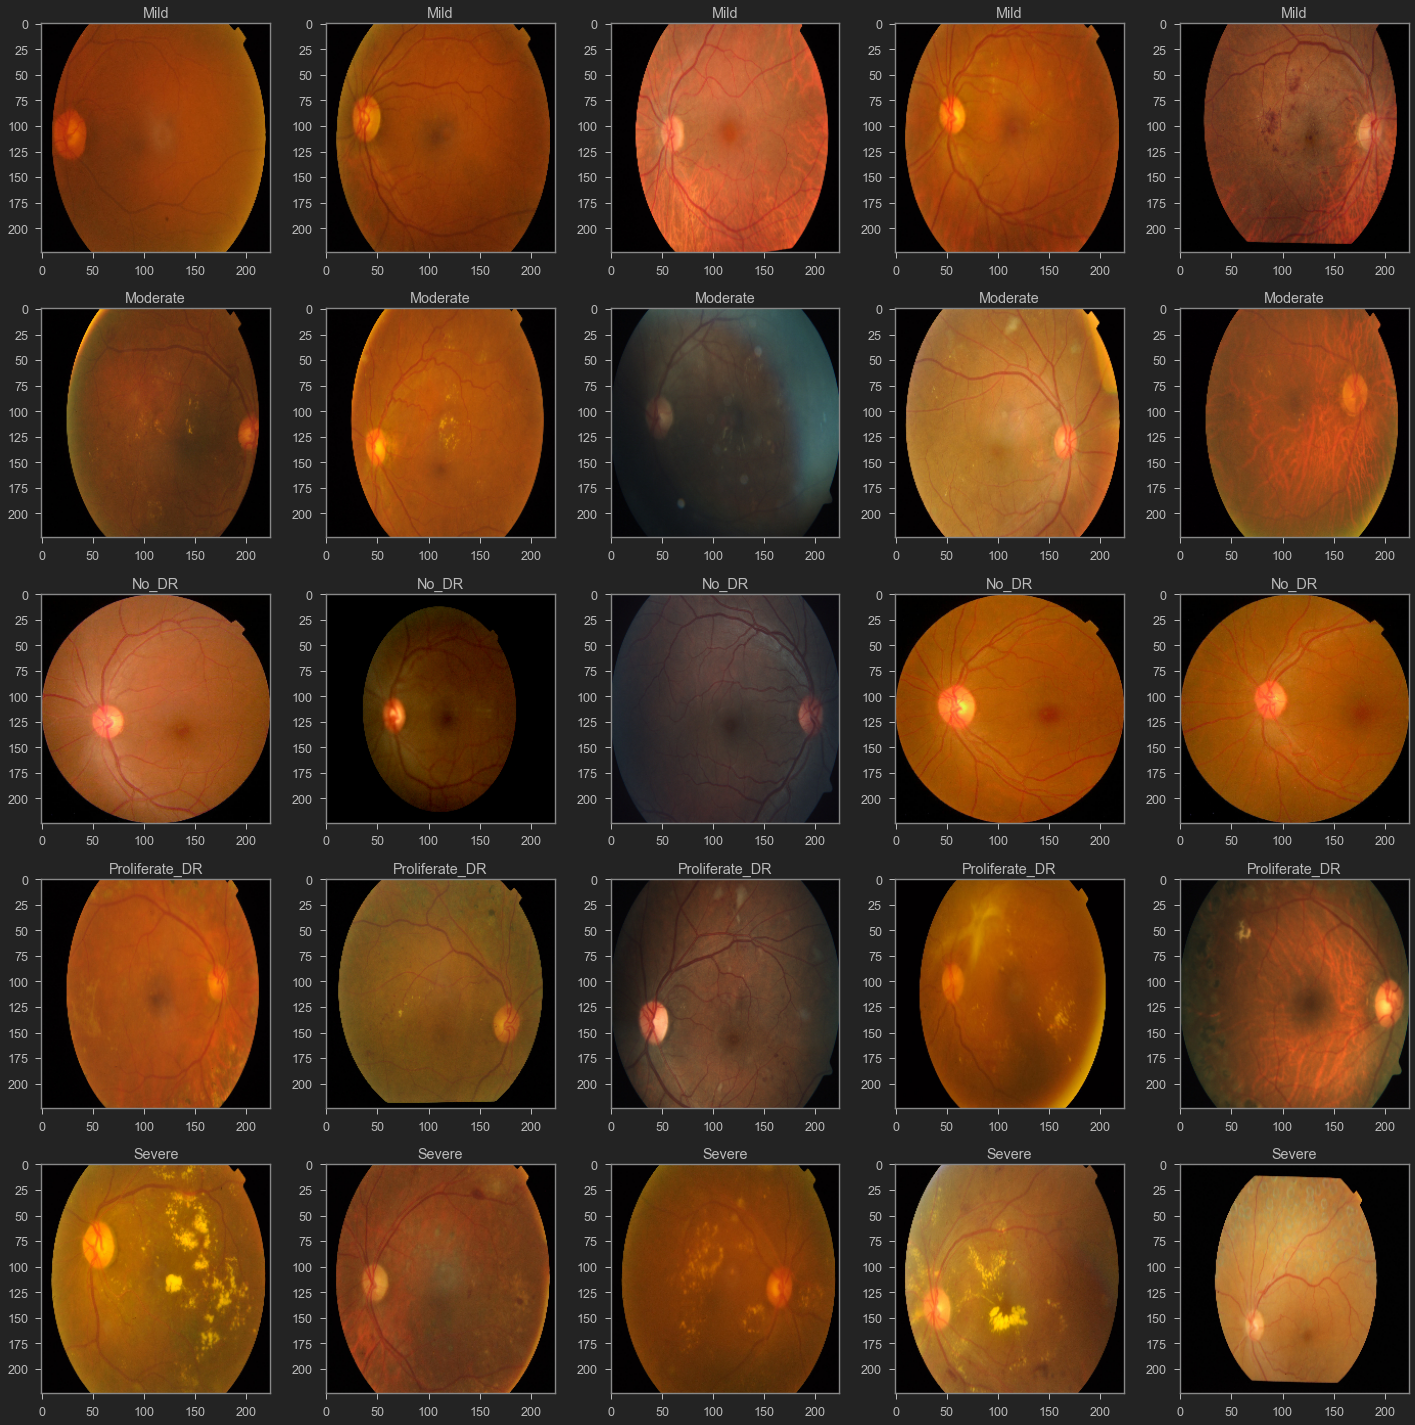

In [9]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
    # get the list of images in a given class
    train_class = os.listdir(os.path.join('train', i))
    # plot 5 images per class
    for j in range(5):
        img = os.path.join('train', i, train_class[j])
        img = PIL.Image.open(img)
        axs[count][j].title.set_text(i)
        axs[count][j].imshow(img)  
    count += 1

fig.tight_layout()

In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
    train_class = os.listdir(os.path.join('train', i))
    No_images_per_class.append(len(train_class))
    Class_name.append(i)
    print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [11]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image  Labels
0       train\Mild\0024cdab0c1e.png    Mild
1       train\Mild\00cb6555d108.png    Mild
2       train\Mild\0124dffecf29.png    Mild
3       train\Mild\01b3aed3ed4c.png    Mild
4       train\Mild\0369f3efe69b.png    Mild
...                             ...     ...
3657  train\Severe\f9156aeffc5e.png  Severe
3658  train\Severe\fb61230b99dd.png  Severe
3659  train\Severe\fcc6aa6755e6.png  Severe
3660  train\Severe\fda39982a810.png  Severe
3661  train\Severe\fe0fc67c7980.png  Severe

[3662 rows x 2 columns]

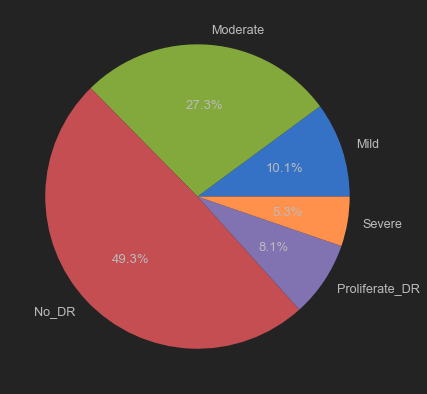

In [12]:
# Plot a pie chart showing the percentage of samples per class
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct='%1.1f%%')
plt.show()

## PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [13]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2, random_state=42)

In [14]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        horizontal_flip=True,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [16]:
# # Experiment with other image augmentation strategies to the training data
# tf.keras.preprocessing.image.ImageDataGenerator(
#       featurewise_center=False,
#       samplewise_center=False,
#       featurewise_std_normalization=False,
#       samplewise_std_normalization=False,
#       zca_whitening=False,
#       zca_epsilon=1e-06,
#       rotation_range=0,
#       width_shift_range=0.0,
#       height_shift_range=0.0,
#       brightness_range=None,
#       shear_range=0.0,
#       zoom_range=0.0,
#       channel_shift_range=0.0,
#       fill_mode="nearest",
#       cval=0.0,
#       horizontal_flip=False,
#       vertical_flip=False,
#       rescale=None,
#       preprocessing_function=None,
#       data_format=None,
#       validation_split=0.3,
#       dtype=None)

## UNDERSTAND THE THEORY AND INTUTION BEHIND CONVOLUTIONAL NEURAL NETWORKS (CNN) AND RESIDUAL BLOCKS

#### RESNET (RESIDUAL NETWORK)

- As CNNs grow deeper, vanishing gradient tend to occur which negatively impact network performance.
- Vanishing gradient problem occurs when the gradient is back-propagated to earlier layers which results in a very small gradient.
- Residual Neural Network includes "skip connection" feature which enables training of 152 layers without vanishing gradient issues.
- ResNet works by adding "identify mappings" on top of the CNN.
- ImageNet contains 11 million images and 11,000 categories. ImageNet is used to train ResNet deep network.


## BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [17]:
def res_block(X, filter, stage):
  
    # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filter
      
    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [18]:
input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 4,987,525 (19.03 MB)

 Trainable params: 4,967,685 (18.95 MB)

 Non-trainable params: 19,840 (77.50 KB)

## COMPILE AND TRAIN DEEP LEARNING MODEL

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Save the best model with lowet validation loss
checkpointer = ModelCheckpoint(filepath='weights.keras', verbose=1, save_best_only=True)

In [21]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 40, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/40


c:\Users\uffin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5490 - loss: 3.1224
Epoch 1: val_loss improved from inf to 1.68680, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.5501 - loss: 3.1052 - val_accuracy: 0.3077 - val_loss: 1.6868
Epoch 2/40
 1/77 ━━━━━━━━━━━━━━━━━━━━ 3:59 3s/step - accuracy: 0.6875 - loss: 0.8246

c:\Users\uffin\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.68680
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6875 - loss: 0.8246 - val_accuracy: 0.1739 - val_loss: 1.8502
Epoch 3/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7034 - loss: 0.8669
Epoch 3: val_loss did not improve from 1.68680
77/77 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7033 - loss: 0.8668 - val_accuracy: 0.0938 - val_loss: 1.7860
Epoch 4/40
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:47 2s/step - accuracy: 0.5625 - loss: 0.9183
Epoch 4: val_loss improved from 1.68680 to 1.67511, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5625 - loss: 0.9183 - val_accuracy: 0.1739 - val_loss: 1.6751
Epoch 5/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7110 - loss: 0.7969
Epoch 5: val_loss improved from 1.67511 to 1.49088, saving model to weights.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.7109 - loss: 0.7968 - val_accuracy: 0.3053 - val_loss: 1.4909
Epoch 6/40
 1/77 ━━━━━━━━━

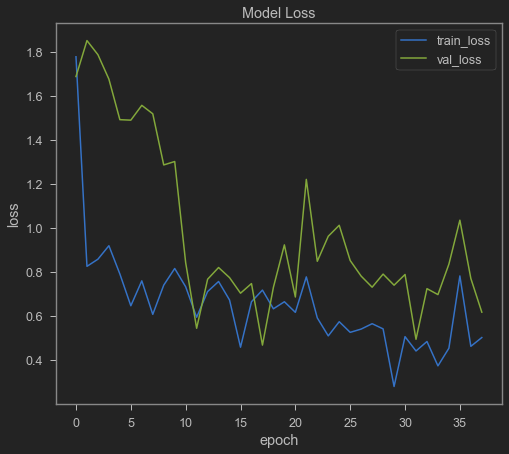

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

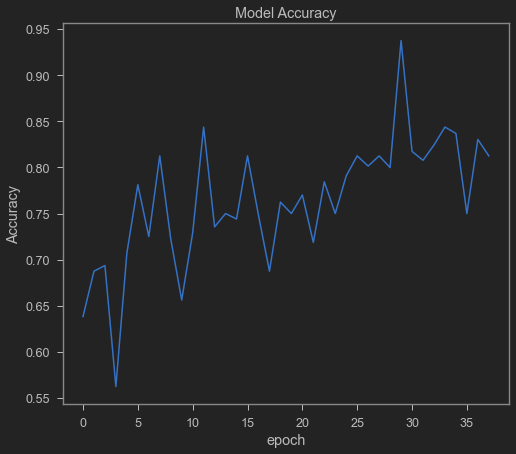

In [23]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

## ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [24]:
model.load_weights('model.weights.h5')

In [25]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps=test_generator.n // 32, verbose=1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7265 - loss: 0.7086
Accuracy Test : 0.7471590638160706


In [26]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}

In [27]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
    # code to open the image
    img= PIL.Image.open(test['Image'].tolist()[item])
    # resizing the image to (256,256)
    img = img.resize((256,256))
    # appending image to the image list
    image.append(img)
    # converting image to array
    img = np.asarray(img, dtype= np.float32)
    # normalizing the image
    img = img / 255
    # reshaping the image in to a 4D array
    img = img.reshape(-1,256,256,3)
    # making prediction of the model
    predict = model.predict(img)
    # getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    # appending the predicted class to the list
    prediction.append(labels[predict])
    # appending original class to the list
    original.append(test['Labels'].tolist()[item])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

In [28]:
# Getting the test accuracy
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7462482946793997


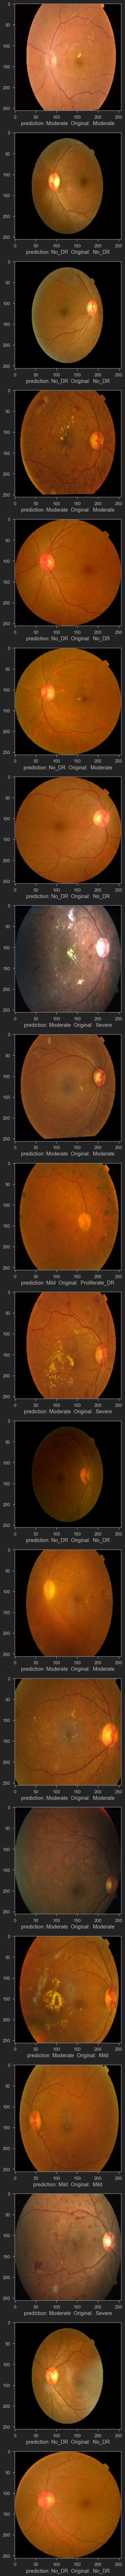

In [29]:
# Visualizing the results
import random
fig=plt.figure(figsize=(100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("prediction: " + prediction[j] + "  Original:  " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [30]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))

                precision    recall  f1-score   support

          Mild       0.38      0.54      0.45        61
      Moderate       0.63      0.74      0.68       195
         No_DR       0.92      0.98      0.95       371
Proliferate_DR       0.20      0.04      0.06        53
        Severe       0.43      0.11      0.18        53

      accuracy                           0.75       733
     macro avg       0.51      0.48      0.46       733
  weighted avg       0.71      0.75      0.71       733



Text(0.5, 1.0, 'Confusion_matrix')

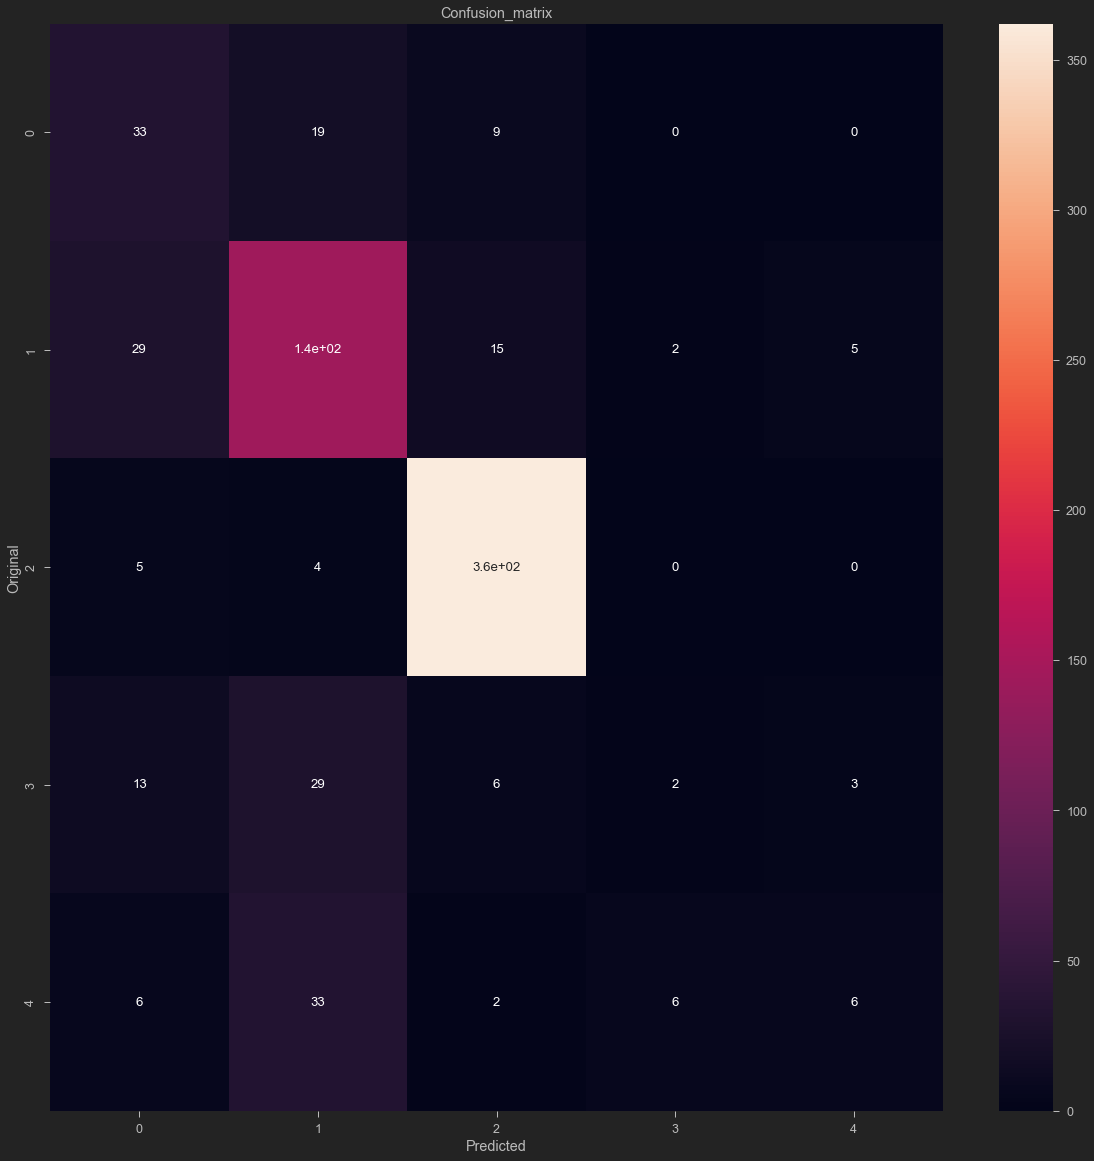

In [31]:
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


### Key Findings
- The dataset consists of 3662 images categorized into five levels of diabetic retinopathy.
- The data was preprocessed using data augmentation techniques to increase model robustness, given the limited number of images.
- ResNet50 and InceptionResNetV2 models were implemented to classify the images, providing strong baselines for further fine-tuning.
- Early experiments show that deep learning models can significantly aid in the accurate detection of diabetic retinopathy, which is crucial for early intervention.

### Conclusion
This project successfully demonstrated the feasibility of using deep learning models, particularly ResNet50 and InceptionResNetV2, to classify retinal images for diabetic retinopathy detection. While further tuning is required to improve the model's accuracy and generalizability, the initial results are promising and highlight the potential for AI-driven solutions in healthcare, especially for underserved regions.